Nuha BinTayyash, 2020

This notebook shows the ROC and precision-recall curves resulted from running GPcounts with one sample test on simulated bulk RNA-seq datasets.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import metrics
import pandas as pd
from scipy import stats

In [2]:
DESeq2 = pd.read_csv('fission_DESeq2_tst_scaled.csv',index_col=[0])
print(DESeq2.shape)
GPcounts_NB = pd.read_csv('ll_Negative_binomial_fission_normalized_counts_scaled.csv',index_col=[0])
GPcounts_G = pd.read_csv('ll_Gaussian_fission_normalized_counts_scaled.csv',index_col=[0])
print(GPcounts_NB.shape)
print(GPcounts_G.shape)

(6459, 6)
(6459, 4)
(6459, 4)


In [3]:
D = GPcounts_NB.shape[0]
true_label = np.zeros(D)
for j in range(D):
    if j %2 == 0:
        true_label[j] = 1
labels = pd.DataFrame(true_label, index =GPcounts_NB.index.values, columns =['label'])
GPcounts_NB = pd.concat([GPcounts_NB,labels],axis = 1)

In [4]:
TP_genes_NB = list(GPcounts_NB.loc[(GPcounts_NB['log_likelihood_ratio'] > 0)&(GPcounts_NB['label']==1.0)].index.values)
len(TP_genes_NB)

365

In [5]:
FP_genes_G = list(GPcounts_G.loc[(GPcounts_G['log_likelihood_ratio'] < 0)&(GPcounts_NB['label']==1.0)].index.values)
FP_genes_G

['SPNCRNA.601',
 'SPAC977.13c',
 'SPAC977.16c',
 'SPNCRNA.603',
 'SPAC1F8.06',
 'SPAC11D3.03c',
 'SPAC11D3.11c',
 'SPNCRNA.609',
 'SPAC5H10.11',
 'SPAC5H10.13c',
 'SPAC13G6.01c',
 'SPAC13G6.14',
 'SPNCRNA.621',
 'SPAC24B11.11c',
 'SPNCRNA.624',
 'SPNCRNA.625',
 'SPNCRNA.626',
 'SPAC806.07',
 'SPAC1F5.11c',
 'SPNCRNA.633',
 'SPAC18B11.10',
 'SPAC18B11.09c',
 'SPAC18B11.07c',
 'SPNCRNA.636',
 'SPAC12G12.15',
 'SPAC12G12.14c',
 'SPAC12G12.10',
 'SPAC12G12.06c',
 'SPAC630.05',
 'SPAC1751.04',
 'SPAC31A2.02',
 'SPAC31A2.03',
 'SPAC31A2.06',
 'SPAC31A2.09c',
 'SPAC31A2.12',
 'SPAC31A2.14',
 'SPAC13C5.01c',
 'SPAC13C5.04',
 'SPAC13C5.05c',
 'SPATRNAVAL.01',
 'SPRRNA.11',
 'SPAC24H6.11c',
 'SPAC24H6.09',
 'SPAC24H6.06',
 'SPAC227.19c',
 'SPAC227.07c',
 'SPAC227.08c',
 'SPAC227.10',
 'SPAC227.12',
 'SPAC227.16c',
 'SPNCRNA.660',
 'SPAC13A11.01c',
 'SPAC3H8.02',
 'SPNCRNA.663',
 'SPNCRNA.667',
 'SPAC1F3.01',
 'SPAC1F3.03',
 'SPAC1D4.01',
 'SPAC1D4.05c',
 'SPAC1D4.10',
 'SPAC22F3.13',
 'SPAC22F3.

In [6]:
best =set(FP_genes_G).intersection(TP_genes_NB)
np.array(best)

array({'SPNCRNA.751', 'SPAC3G9.01', 'SPAC1142.09', 'SPBC428.05c', 'SPNCRNA.886', 'SPNCRNA.1037', 'SPNCRNA.1304', 'SPNCRNA.1509', 'SPAC23H4.16c', 'SPNCRNA.833', 'SPNCRNA.110', 'SPNCRNA.1497', 'SPCC1620.02', 'SPBC13G1.06c', 'SPNCRNA.1212', 'SPNCRNA.1492', 'SPCP20C8.02c', 'SPCC11E10.03', 'SPNCRNA.663', 'SPNCRNA.872', 'SPBC1348.01', 'SPAC1687.17c', 'SPAC3A11.11c', 'SPAC1805.18', 'SPNCRNA.257', 'SPAPB8E5.08', 'SPNCRNA.399', 'SPAC13D6.01', 'SPNCRNA.1502', 'SPNCRNA.1619', 'SPCC576.02', 'SPNCRNA.1255', 'SPAC664.12c', 'SPNCRNA.346', 'SPAPJ695.02', 'SPBC56F2.10c', 'SPNCRNA.662', 'SPNCRNA.730', 'SPAC23C11.07', 'SPCC4B3.08', 'SPNCRNA.1127', 'SPBC1A4.06c', 'SPNCRNA.1109', 'SPCC13B11.04c', 'SPAC12B10.08c', 'SPNCRNA.47', 'SPAC23A1.17', 'SPBC1703.08c', 'SPNCRNA.1363', 'SPBC1709.09', 'SPNCRNA.735', 'SPNCRNA.673', 'SPNCRNA.562', 'SPNCRNA.1091', 'SPAC750.06c', 'SPAC16E8.18', 'SPNCRNA.291', 'SPNCRNA.1506', 'SPNCRNA.842', 'SPNCRNA.1377', 'SPNCRNA.1460', 'SPNCRNA.1138', 'SPNCRNA.879', 'SPNCRNA.284', 'SPBP8B

In [7]:
DESeq_sorted = DESeq2.sort_values(by=['pvalue'])
DESeq_sorted

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
SPNCRNA.1144,1.217305,8.521276,2.715801,9.341284e+00,0.002240,1
SPCC417.06c,1.412600,-5.961226,2.005189,8.669340e+00,0.003236,1
SPNCRNA.488,5.104772,-3.670428,1.277721,8.477169e+00,0.003596,1
SPAC1A6.08c,28.279930,1.553550,0.530327,8.324654e+00,0.003911,1
SPNCRNA.1387,1.468483,-5.613072,2.101783,8.097483e+00,0.004433,1
...,...,...,...,...,...,...
SPBC31F10.15c,441.505530,-0.000098,0.241508,1.484479e-07,0.999693,1
SPAC139.06,354.301526,-0.000020,0.248570,4.083859e-09,0.999949,1
SPNCRNA.1326,3.825882,-0.061994,3.192256,-4.851704e-04,1.000000,1
SPAC513.04,1.076923,-0.820488,3.293259,-2.406579e-02,1.000000,1


In [8]:
GPcounts_NB_sorted = GPcounts_NB.sort_values(by=['log_likelihood_ratio'], ascending=False)
GPcounts_NB_sorted

,Shared_log_likelihood,model_1_log_likelihood,model_2_log_likelihood,log_likelihood_ratio,label
SPBC887.07,-176.241596,-91.792989,-12.316352,72.132255,1.0
SPAP27G11.13c,-281.553889,-126.767912,-125.208064,29.577913,0.0
SPAC186.05c,-207.496271,-88.502419,-89.823403,29.170448,1.0
SPAC6B12.15,-370.623895,-169.996003,-174.455329,26.172563,0.0
SPCC736.10c,-235.047798,-105.767248,-103.260998,26.019551,0.0
...,...,...,...,...,...
SPAC11E3.14,-229.246652,-142.203777,-141.752247,-54.709373,1.0
SPCC1183.11,-262.047533,-158.642229,-158.257376,-54.852073,1.0
SPBC4B4.08,-298.151794,-177.096589,-178.714398,-57.659193,0.0
SPAC2C4.17c,-241.517819,-150.100422,-149.079798,-57.662400,0.0


In [9]:
GPcounts_G_sorted = GPcounts_G.sort_values(by=['log_likelihood_ratio'], ascending=False)
GPcounts_G


,Shared_log_likelihood,model_1_log_likelihood,model_2_log_likelihood,log_likelihood_ratio
SPAC212.11,-47.334333,-25.600127,-19.603073,2.131133
SPAC212.09c,-31.970118,-19.856527,-16.491650,-4.378059
SPAC212.04c,-42.335074,-21.778458,-16.415380,4.141236
SPAC212.01c,-29.851720,-11.047010,-17.930226,0.874484
SPNCRNA.601,-40.436575,-21.089868,-21.462252,-2.115545
...,...,...,...,...
SPMITTRNATYR.01,-28.942428,-17.146744,-15.723317,-3.927633
SPMITTRNAILE.02,-20.967152,-10.587305,-13.836585,-3.456738
SPMIT.10,204.140379,96.746342,96.746342,-10.647696
SPMITTRNAGLU.01,-27.065052,-13.608830,-16.884620,-3.428398


0.1
0.29301654779308345


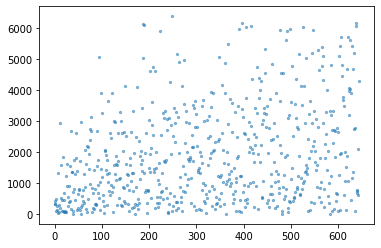

0.21976527293371714


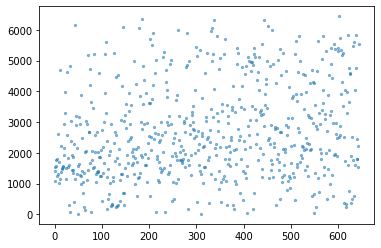

0.2
0.27634980097541095


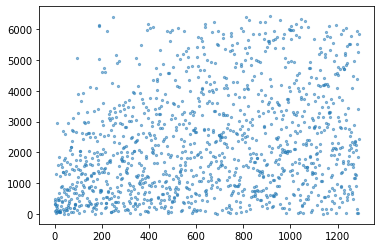

0.13755793346372053


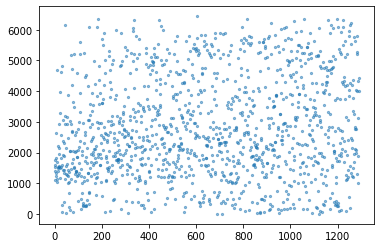

0.30000000000000004
0.2964417221699564


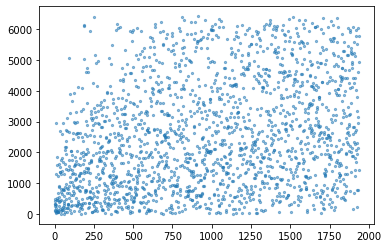

0.1575298606987491


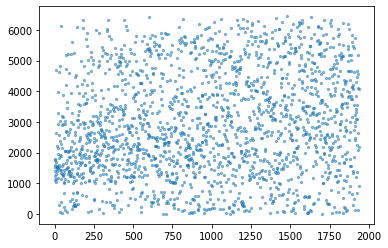

0.4
0.2925321292544864


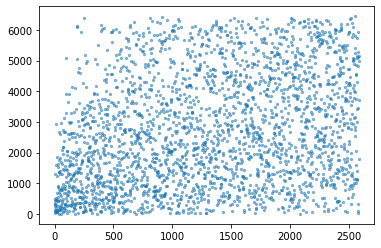

0.15173884176282476


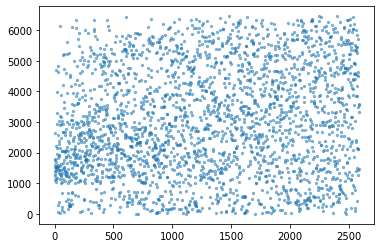

0.5
0.2741631946974496


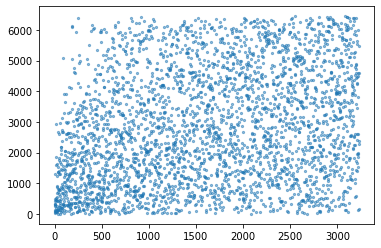

0.12086519198733021


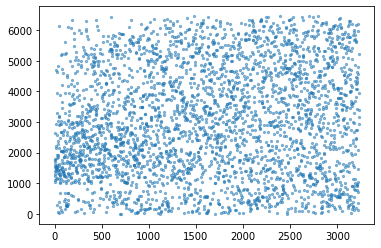

0.6000000000000001
0.2936500564753688


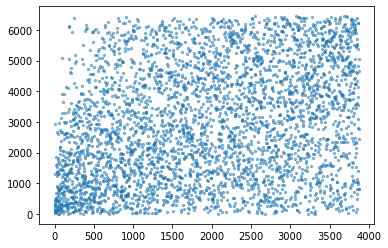

0.11800367792391314


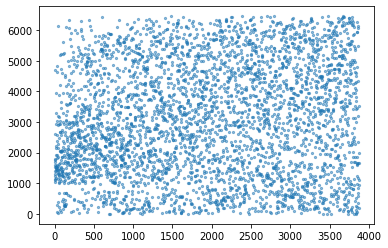

0.7000000000000001
0.2809865675180554


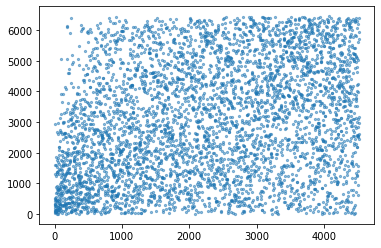

0.12376289585272215


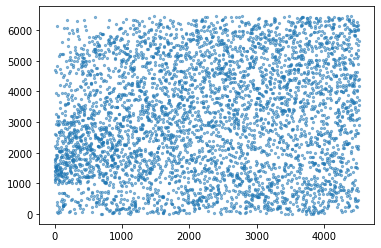

0.8
0.27136134308126614


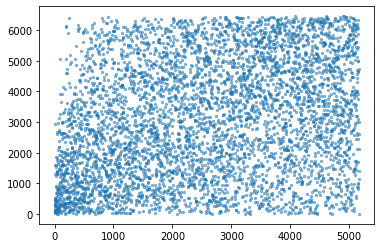

0.12273020746342503


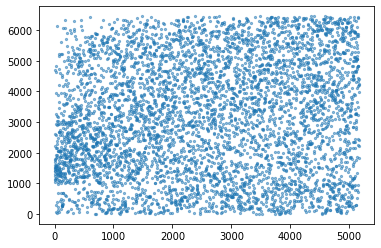

0.9
0.27560206120045583


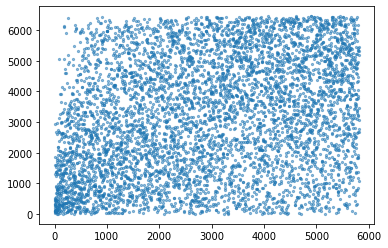

0.1267926937828106


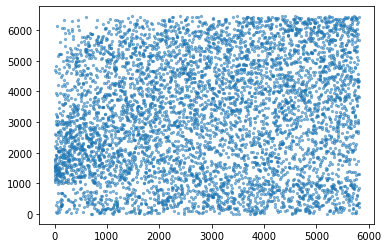

1.0
0.2585937254603825


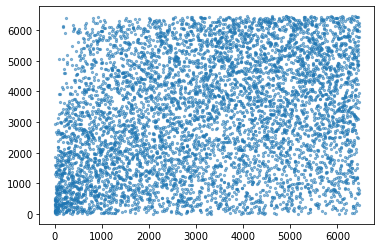

0.12344879178742217


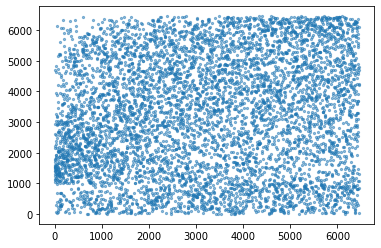

In [10]:
percentage = np.array(list(range(1,11)))
percentage = percentage * .10
DESeq_id = list(DESeq_sorted.index.values)
GPcounts_NB_id = list(GPcounts_NB_sorted.index)
GPcounts_G_id = list(GPcounts_G_sorted.index)
corr_NB = []
corr_G = []

for count in range(10):
    print(percentage[count])
    DESeq_id_part= DESeq_id[int(len(DESeq_id) * .0) : int(len(DESeq_id) * percentage[count])]
    GPcounts_NB_index_part = []
    GPcounts_G_index_part = []
    for i in DESeq_id_part:
        GPcounts_NB_index_part.append(GPcounts_NB_id.index(i))
        GPcounts_G_index_part.append(GPcounts_G_id.index(i))
    
    DESeq_index_part = list(range(0,len(DESeq_id_part)))
    rho, pval = stats.spearmanr(DESeq_index_part,GPcounts_NB_index_part)
    print(rho)
    corr_NB.append(rho)
    plt.scatter(DESeq_index_part ,GPcounts_NB_index_part,s=5,alpha=0.5)
    plt.show() 
    
    rho, pval = stats.spearmanr(DESeq_index_part,GPcounts_G_index_part)
    print(rho)
    corr_G.append(rho)
    plt.scatter(DESeq_index_part ,GPcounts_G_index_part,s=5,alpha=0.5)
    plt.show() 
   

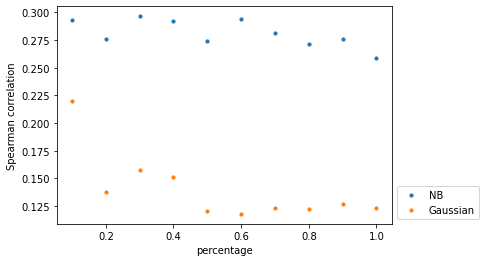

In [11]:
plt.scatter(percentage,corr_NB,s=10,label = 'NB')
plt.scatter(percentage,corr_G,s=10,label = 'Gaussian')
plt.xlabel('percentage')
plt.ylabel('Spearman correlation')
plt.legend(bbox_to_anchor=(1, 0), loc='lower left', ncol=1)

sort GPcounts results according to DESeq2 

In [12]:
GPcounts_NB_DESeq_sorted = GPcounts_NB.reindex(list(DESeq_sorted.index.values))
GPcounts_NB_DESeq_sorted 

,Shared_log_likelihood,model_1_log_likelihood,model_2_log_likelihood,log_likelihood_ratio,label
SPNCRNA.1144,-46.838541,-18.310911,-26.930489,1.597142,0.0
SPCC417.06c,-52.096218,-27.622742,-23.361360,1.112115,1.0
SPNCRNA.488,-96.883990,-45.829335,-49.393406,1.661249,0.0
SPAC1A6.08c,-142.970870,-70.438985,-71.753853,0.778032,0.0
SPNCRNA.1387,-55.048429,-25.431536,-25.753000,3.863893,0.0
...,...,...,...,...,...
SPBC31F10.15c,-210.189300,-109.155705,-105.628356,-4.594761,0.0
SPAC139.06,-200.461820,-106.235256,-102.106749,-7.880185,0.0
SPNCRNA.1326,-61.228290,-33.729938,-27.685083,-0.186731,0.0
SPAC513.04,-40.188267,-30.364343,-8.123455,1.700470,0.0


In [13]:
GPcounts_G_DESeq_sorted = GPcounts_G.reindex(list(DESeq_sorted.index.values))
GPcounts_G_DESeq_sorted

,Shared_log_likelihood,model_1_log_likelihood,model_2_log_likelihood,log_likelihood_ratio
SPNCRNA.1144,-28.252554,-7.693571,-16.548514,4.010469
SPCC417.06c,-28.252541,-16.480428,-10.593269,1.178844
SPNCRNA.488,-42.925625,-20.567028,-21.944433,0.414164
SPAC1A6.08c,-32.244224,-15.668771,-16.903525,-0.328071
SPNCRNA.1387,-27.023301,-15.753947,-11.047397,0.221958
...,...,...,...,...
SPBC31F10.15c,-25.768767,-18.327458,-14.010903,-6.569594
SPAC139.06,-16.408093,-11.907392,-9.140208,-4.639507
SPNCRNA.1326,-37.803552,-22.839592,-10.479917,4.484043
SPAC513.04,-29.830779,-20.227727,107.798701,117.401754


64
0.0599125028467483
[2.         1.         0.06066438 0.00224049]
4


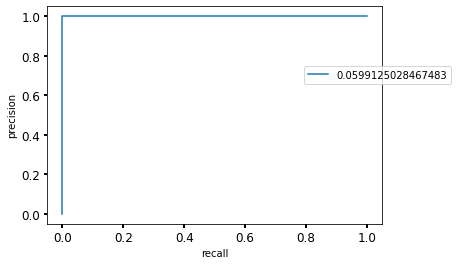

In [14]:
half_of_the_data =int(len(DESeq_id) * .01)
print(half_of_the_data)
print(DESeq_sorted['pvalue'][half_of_the_data-1])
true_label = np.zeros(len(DESeq_sorted))

for j in range(len(DESeq_sorted)):
    if DESeq_sorted['pvalue'][j] <= DESeq_sorted['pvalue'][half_of_the_data-1]:
        true_label[j] = 1
labels = pd.DataFrame(true_label, index =DESeq_sorted.index.values, columns =['label'])

precision, recall,threshold = metrics.roc_curve(labels['label'],DESeq_sorted['pvalue'])
print(threshold)
print(len(threshold))
plt.plot( recall,precision,label=DESeq_sorted['pvalue'][half_of_the_data-1])
plt.tick_params(labelsize='large', width=2) 

plt.xlabel('recall')
plt.ylabel('precision')
plt.legend(loc='best', bbox_to_anchor=(1.22, .75))


[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0]


/Users/nuhabintayyash/opt/anaconda3/envs/myenv2/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


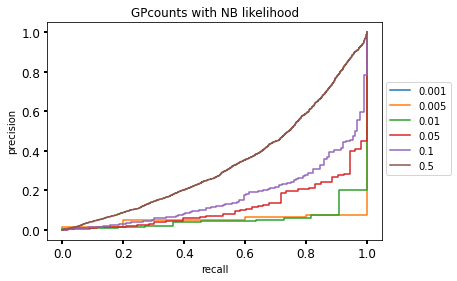

/Users/nuhabintayyash/opt/anaconda3/envs/myenv2/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


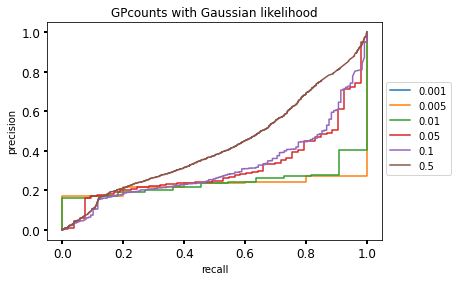

In [15]:
#percentage = np.array(list(range(.1,10)))
percentage = [.001,.005,.01,.05,.1,.5,1.]
print(percentage)
DESeq_id = list(DESeq_sorted.index.values)
fig = plt.figure()

dfs = [GPcounts_NB_DESeq_sorted['log_likelihood_ratio'],GPcounts_G_DESeq_sorted['log_likelihood_ratio']]
D = len(DESeq_sorted)

for df in range(len(dfs)):
    D = len(DESeq_sorted)
    for i in range(6):
        true_label = np.zeros(D)
        #pval_index =int(len(DESeq_id) * percentage[i])-1
        #print(pval_index)
        #print(DESeq_sorted['pvalue'][pval_index])

        for j in range(D):
            if DESeq_sorted['pvalue'][j] <=  percentage[i]:
                true_label[j] = 1

        labels = pd.DataFrame(true_label, index =DESeq_sorted.index.values, columns =['label'])

        precision, recall, thresholds = metrics.roc_curve(labels['label'],dfs[df][0:D])

        plt.plot( recall,precision,label=percentage[i])
        plt.tick_params(labelsize='large', width=2) 
        plt.xlabel('recall')
        plt.ylabel('precision')
        plt.legend(loc='best', bbox_to_anchor=(1.22, .75))
        
        if df == 0:
            title = 'GPcounts with NB likelihood'
        else:
            title = 'GPcounts with Gaussian likelihood'
            
        plt.title(title )
        
        
    plt.show()


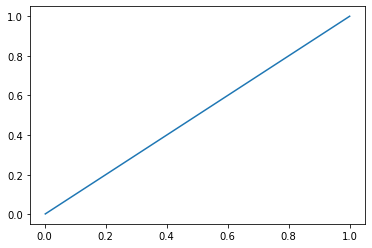

In [16]:
plt.plot(DESeq_sorted['pvalue'],DESeq_sorted['pvalue'])

In [17]:
DESeq_sorted['pvalue']

SPNCRNA.1144     0.002240
SPCC417.06c      0.003236
SPNCRNA.488      0.003596
SPAC1A6.08c      0.003911
SPNCRNA.1387     0.004433
                   ...   
SPBC31F10.15c    0.999693
SPAC139.06       0.999949
SPNCRNA.1326     1.000000
SPAC513.04       1.000000
SPBC21C3.18      1.000000
Name: pvalue, Length: 6459, dtype: float64

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
index 644
pvalue 0.300289125680945
at 0.1
{0.0: 5814, 1.0: 645}
index 1290
pvalue 0.4429014083434001
at 0.2
{0.0: 5168, 1.0: 1291}
index 1936
pvalue 0.5434138200728039
at 0.3
{0.0: 4522, 1.0: 1937}
index 2582
pvalue 0.634525156010338
at 0.4
{0.0: 3876, 1.0: 2583}
index 3228
pvalue 0.7130298068841809
at 0.5
{0.0: 3230, 1.0: 3229}
index 3874
pvalue 0.7785912398594959
at 0.6
{0.0: 2584, 1.0: 3875}
index 4520
pvalue 0.8409856702118729
at 0.7
{0.0: 1938, 1.0: 4521}
index 5166
pvalue 0.8974720747837059
at 0.8
{0.0: 1292, 1.0: 5167}
index 5812
pvalue 0.9517169324832891
at 0.9
{0.0: 646, 1.0: 5813}


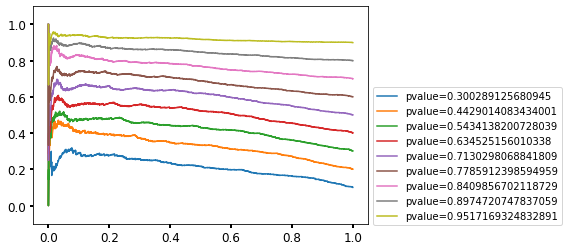

index 644
pvalue 0.300289125680945
at 0.1
{0.0: 5814, 1.0: 645}
index 1290
pvalue 0.4429014083434001
at 0.2
{0.0: 5168, 1.0: 1291}
index 1936
pvalue 0.5434138200728039
at 0.3
{0.0: 4522, 1.0: 1937}
index 2582
pvalue 0.634525156010338
at 0.4
{0.0: 3876, 1.0: 2583}
index 3228
pvalue 0.7130298068841809
at 0.5
{0.0: 3230, 1.0: 3229}
index 3874
pvalue 0.7785912398594959
at 0.6
{0.0: 2584, 1.0: 3875}
index 4520
pvalue 0.8409856702118729
at 0.7
{0.0: 1938, 1.0: 4521}
index 5166
pvalue 0.8974720747837059
at 0.8
{0.0: 1292, 1.0: 5167}
index 5812
pvalue 0.9517169324832891
at 0.9
{0.0: 646, 1.0: 5813}


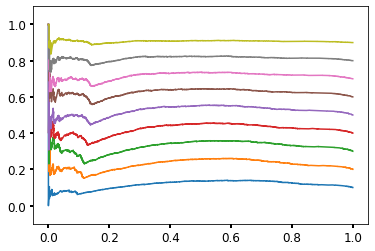

In [18]:
#percentage = np.array(list(range(.1,10)))
percentage = [.1,.2,.3,.4,.5,.6,.7,.8,.9]
#[.0001,.001,.005,.01,.05,.1,.5,1.]
print(percentage)
DESeq_id = list(DESeq_sorted.index.values)
fig = plt.figure()

dfs = [GPcounts_NB_DESeq_sorted['log_likelihood_ratio'],GPcounts_G_DESeq_sorted['log_likelihood_ratio']]
D = len(DESeq_sorted)

for df in range(len(dfs)):
    D = len(DESeq_sorted)
    for i in range(9):
        true_label = np.zeros(D)
        pval_index =int(len(DESeq_sorted['pvalue']) * percentage[i])-1
        print('index',pval_index)
        print('pvalue',DESeq_sorted['pvalue'][pval_index])
        print('at',percentage[i])

        for j in range(D):
            if DESeq_sorted['pvalue'][j] <= DESeq_sorted['pvalue'][pval_index]:
                true_label[j] = 1

        labels = pd.DataFrame(true_label, index =DESeq_sorted.index.values, columns =['label'])
        
        unique, counts = np.unique(true_label, return_counts=True)
        
        print(dict(zip(unique, counts)))
        precision, recall, thresholds = metrics.precision_recall_curve(labels['label'],dfs[df])
        #print(precision, recall, thresholds )
        plt.plot( recall,precision,label='pvalue='+str(DESeq_sorted['pvalue'][pval_index]))
        plt.tick_params(labelsize='large', width=2) 
        '''
        plt.xlabel('recall')
        plt.ylabel('precision')
        plt.legend(loc='best', bbox_to_anchor=(1.22, .75))
        '''
        if df == 0:
            plt.legend(loc='best', bbox_to_anchor=(1., .65))
        
            #title = 'GPcounts with NB likelihood'
        '''
        else:
            title = 'GPcounts with Gaussian likelihood'
            
        plt.title(title )
        '''
        plt.ylim([-.1,1.1])
        
    plt.show()


[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
index 644
pvalue 0.300289125680945
at 0.1
{0.0: 5814, 1.0: 645}
index 1290
pvalue 0.4429014083434001
at 0.2
{0.0: 5168, 1.0: 1291}
index 1936
pvalue 0.5434138200728039
at 0.3
{0.0: 4522, 1.0: 1937}
index 2582
pvalue 0.634525156010338
at 0.4
{0.0: 3876, 1.0: 2583}
index 3228
pvalue 0.7130298068841809
at 0.5
{0.0: 3230, 1.0: 3229}
index 3874
pvalue 0.7785912398594959
at 0.6
{0.0: 2584, 1.0: 3875}
index 4520
pvalue 0.8409856702118729
at 0.7
{0.0: 1938, 1.0: 4521}
index 5166
pvalue 0.8974720747837059
at 0.8
{0.0: 1292, 1.0: 5167}
index 5812
pvalue 0.9517169324832891
at 0.9
{0.0: 646, 1.0: 5813}


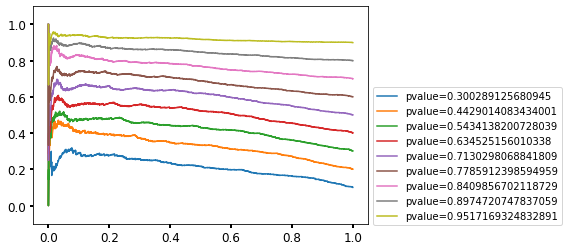

index 644
pvalue 0.300289125680945
at 0.1
{0.0: 5814, 1.0: 645}
index 1290
pvalue 0.4429014083434001
at 0.2
{0.0: 5168, 1.0: 1291}
index 1936
pvalue 0.5434138200728039
at 0.3
{0.0: 4522, 1.0: 1937}
index 2582
pvalue 0.634525156010338
at 0.4
{0.0: 3876, 1.0: 2583}
index 3228
pvalue 0.7130298068841809
at 0.5
{0.0: 3230, 1.0: 3229}
index 3874
pvalue 0.7785912398594959
at 0.6
{0.0: 2584, 1.0: 3875}
index 4520
pvalue 0.8409856702118729
at 0.7
{0.0: 1938, 1.0: 4521}
index 5166
pvalue 0.8974720747837059
at 0.8
{0.0: 1292, 1.0: 5167}
index 5812
pvalue 0.9517169324832891
at 0.9
{0.0: 646, 1.0: 5813}


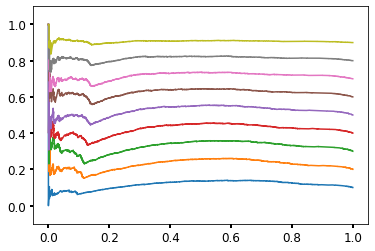

In [20]:
#percentage = np.array(list(range(.1,10)))
percentage = [.1,.2,.3,.4,.5,.6,.7,.8,.9]
#[.0001,.001,.005,.01,.05,.1,.5,1.]
print(percentage)
DESeq_id = list(DESeq_sorted.index.values)
fig = plt.figure()

dfs = [GPcounts_NB_DESeq_sorted['log_likelihood_ratio'],GPcounts_G_DESeq_sorted['log_likelihood_ratio']]
D = len(DESeq_sorted)

for df in range(len(dfs)):
    D = len(DESeq_sorted)
    for i in range(9):
        true_label = np.zeros(D)
        pval_index =int(len(DESeq_sorted['pvalue']) * percentage[i])-1
        print('index',pval_index)
        print('pvalue',DESeq_sorted['pvalue'][pval_index])
        print('at',percentage[i])

        for j in range(D):
            if DESeq_sorted['pvalue'][j] <= DESeq_sorted['pvalue'][pval_index]:
                true_label[j] = 1

        labels = pd.DataFrame(true_label, index =DESeq_sorted.index.values, columns =['label'])
        
        unique, counts = np.unique(true_label, return_counts=True)
        
        print(dict(zip(unique, counts)))
        precision, recall, thresholds = metrics.precision_recall_curve(labels['label'],dfs[df])
        #print(precision, recall, thresholds )
        plt.plot( recall,precision,label='pvalue='+str(DESeq_sorted['pvalue'][pval_index]))
        plt.tick_params(labelsize='large', width=2) 
        '''
        plt.xlabel('recall')
        plt.ylabel('precision')
        plt.legend(loc='best', bbox_to_anchor=(1.22, .75))
        '''
        if df == 0:
            plt.legend(loc='best', bbox_to_anchor=(1., .65))
        
            #title = 'GPcounts with NB likelihood'
        '''
        else:
            title = 'GPcounts with Gaussian likelihood'
            
        plt.title(title )
        '''
        plt.ylim([-.1,1.1])
        
    plt.show()
